In [1]:
import numpy as np
import os, json
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import numpy as np
import cv2
from astropy.modeling.models import Gaussian2D
from PIL import Image

In [63]:
def setupGtruthMap(headCoord, tailCoord, imgFileName):
    '''

    :param headCoord:
    :param tailCoord:
    :param img:
    :return:
    '''
    assert isinstance(tailCoord, dict)
    assert isinstance(img, str)
    if not os.path.exists(imgFileName):
        raise("Could not find file or does not exist")
    
    # Initialize colormap
    mycmap = transparent_cmap(plt.cm.BuGn)
    
    fig, ax = plt.subplots(1, 2, figsize=(20,4))
    img1 = cv2.imread(imgFileName, 0)
    ax[0].imshow(img1)
    
    # Set up Gaussian at coordinates
    sigma = 7
    amplitude = 300
    headGauss = Gaussian2D(amplitude, headCoord['x'], headCoord['y'], sigma, sigma)
    tailGauss = Gaussian2D(amplitude, tailCoord['x'], tailCoord['y'], sigma, sigma)

    height = np.arange(img1.shape[0])
    width = np.arange(img1.shape[1])
    x, y = np.meshgrid(width, height)

    data2DHead = headGauss(x, y)
    data2DTail = tailGauss(x, y)
    ax[0].contourf(data2DHead, cmap=mycmap, interpolation='nearest')
    ax[0].contourf(data2DTail, cmap=mycmap, interpolation='nearest')

    data2DAll = img1 + data2DHead + data2DTail
    ax[1].imshow(data2DAll)
    plt.tight_layout()
    plt.savefig('tst.png')
    return data2DHead, data2DTail

def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap

/data5/Plankton_wi18/rawcolor_db/images/20170124_001/SPCBench-1485287284-000752-001-36-2108-192-72-_rawcolor.png
/data5/Plankton_wi18/rawcolor_db/images/20170124_002/SPCBench-1485292923-001227-001-12-768-80-120-_rawcolor.png
/data5/Plankton_wi18/rawcolor_db/images/20170126_001/SPCBench-1485458360-001000-000-168-1748-72-184-_rawcolor.png
/data5/Plankton_wi18/rawcolor_db/images/20170126_002/SPCBench-1485461730-000259-001-492-2332-207-104-_rawcolor.png
/data5/Plankton_wi18/rawcolor_db/images/20170126_003/SPCBench-1485464427-003008-001-4-2516-104-88-_rawcolor.png


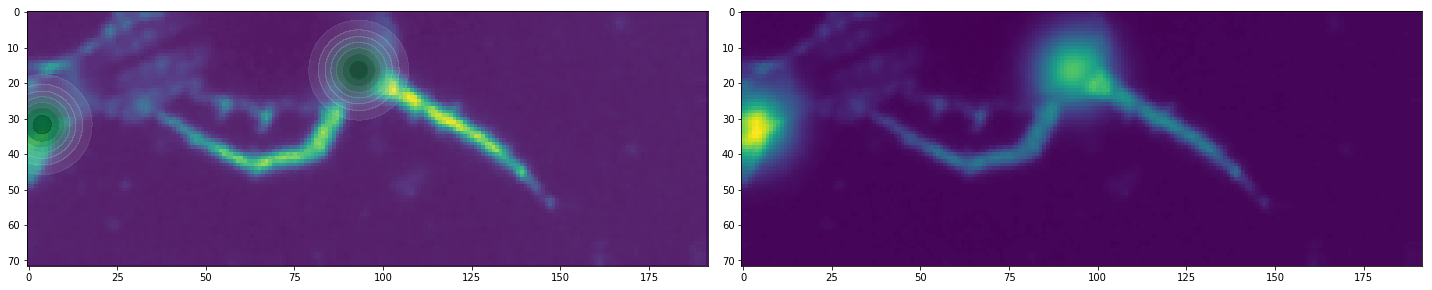

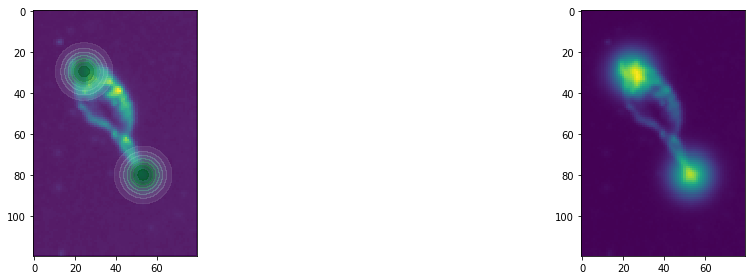

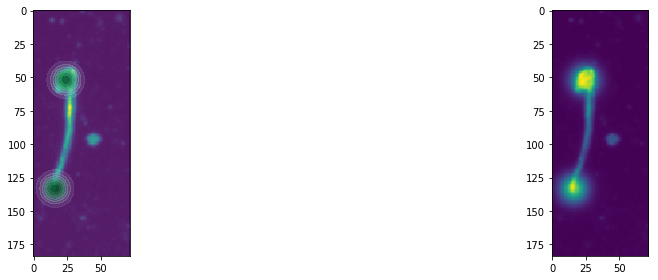

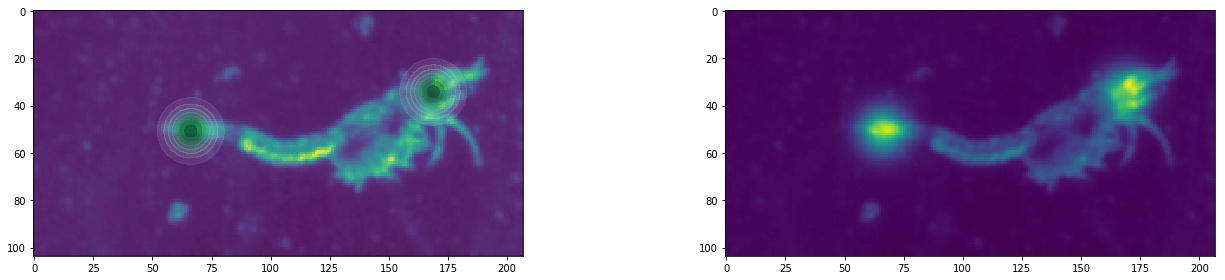

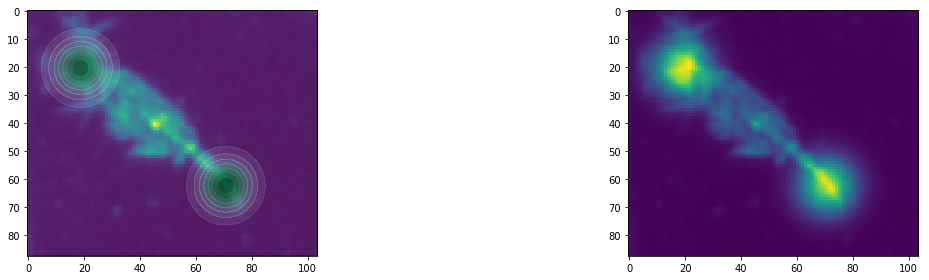

In [65]:
root = '/data5/Plankton_wi18/'
specimenList = sorted(os.listdir(root + 'rawcolor_db/images'))
for j in range(5):
    imgFileNames = open(root + 'rawcolor_db/subsets/{}-timeseries.lst'.format(specimenList[j])).read().splitlines()
    metaData = json.load(open(root + 'rawcolor_db/meta/{}-meta.json'.format(specimenList[j])))
    imgFileNames = [fn for fn in metaData if 'annotation' in metaData[fn]]
    
    pose = metaData[imgFileNames[j]]['annotation']
    headOOF = [isinstance(p['head'], dict) for p in pose]
    tailOOF = [isinstance(p['tail'], dict) for p in pose]
    if not all(tailOOF) or not all(headOOF):
        continue
    img = os.path.join(root,'rawcolor_db', 'images', imgFileNames[j])
    print img
    head_x = np.median ([p['head']['x'] for p in pose])
    head_y = np.median ([p['head']['y'] for p in pose])
    tail_x = np.median ([p['tail']['x'] for p in pose])
    tail_y = np.median ([p['tail']['y'] for p in pose])

    head = {'x': head_x, 'y': head_y}
    tail = {'x': tail_x, 'y': tail_y}
    data2DHead, data2DTail = setupGtruthMap(head, tail, img)

In [52]:
np.dstack((data2DHead, data2DHead, data2DHead)).shape

(88, 104, 3)